In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import logging
from datetime import datetime, timedelta

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [9]:
def plot_total_precipitation(file_path, date_str):
    try:
        ds = xr.open_dataset(file_path)
        total_precip = ds['tp'].sel(
            latitude=slice(28, 20),
            longitude=slice(85, 94)
        )
        
        times = pd.to_datetime(total_precip.valid_time.values)
        target_date = pd.to_datetime(date_str).date()
        date_indices = [i for i, date in enumerate(times) if date.date() == target_date]
        
        if not date_indices:
            logging.warning(f"No data found for date {target_date}")
            return
        
        daily_precip = total_precip[date_indices].mean(dim='valid_time')
        
        fig = plt.figure(figsize=(18, 12))
        ax = plt.axes(projection=ccrs.PlateCarree())
        
        lons, lats = np.meshgrid(daily_precip.longitude, daily_precip.latitude)
        
        im = ax.contourf(lons, lats,
                        daily_precip.values * 1000,
                        levels=20,
                        cmap='YlGnBu',
                        transform=ccrs.PlateCarree())
        
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS)
        ax.gridlines(draw_labels=True)
        
        ax.set_extent([84, 95, 19, 29])
        
        plt.title(f'Daily Average Precipitation (East of 85°E, South of 28°N)\n{target_date}')
        plt.colorbar(im, label='Precipitation (mm/day)')
        
        plt.show()
        
    except Exception as e:
        logging.error(f"Error processing {date_str}: {str(e)}")

2025-04-13 22:36:59,998 - INFO - Processing 2024-08-06


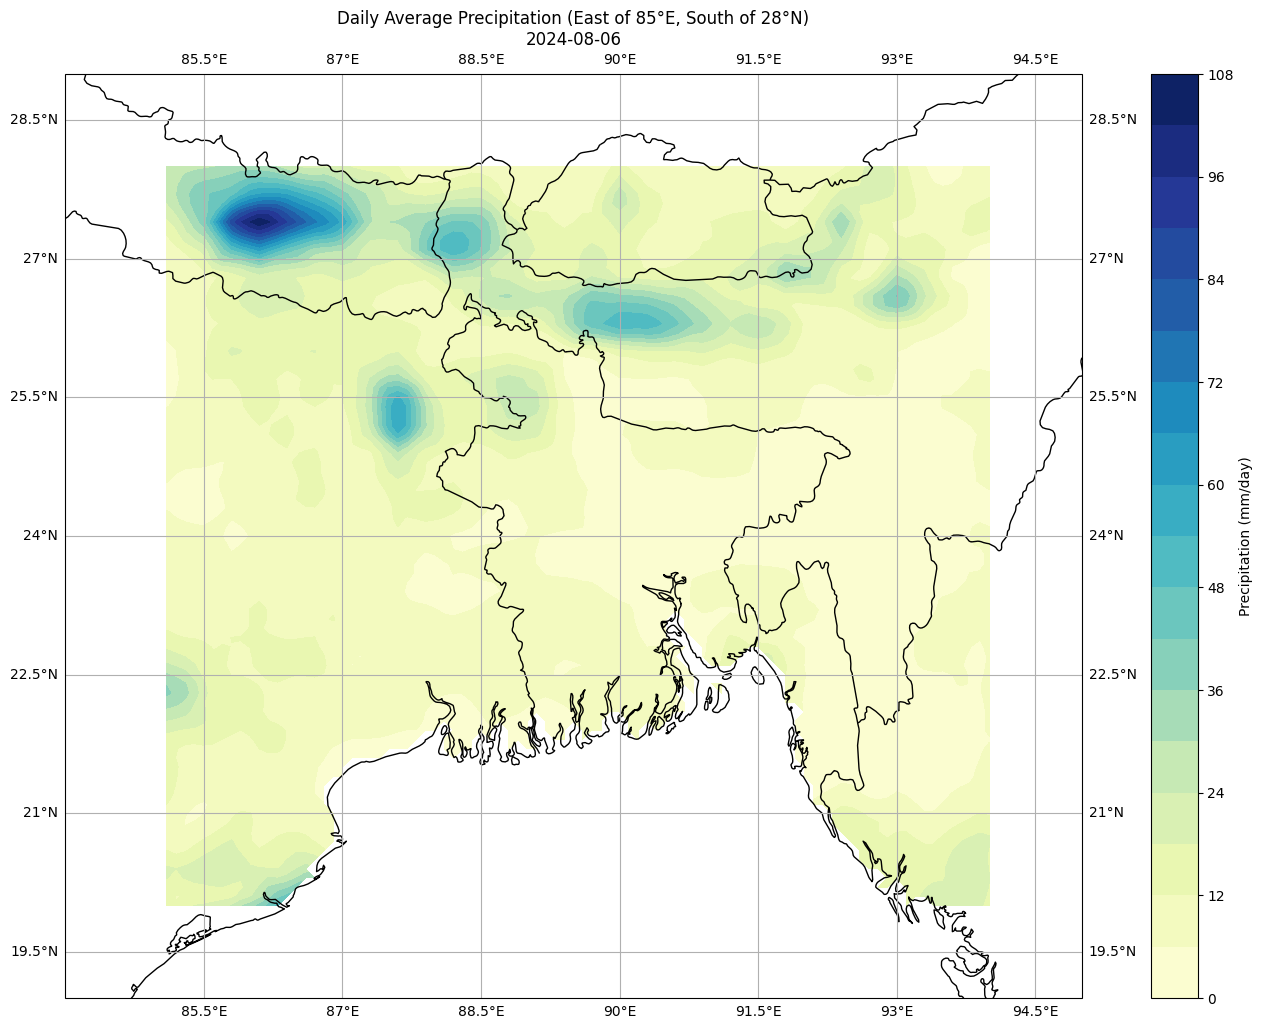

2025-04-13 22:37:00,879 - INFO - Processing 2024-08-07


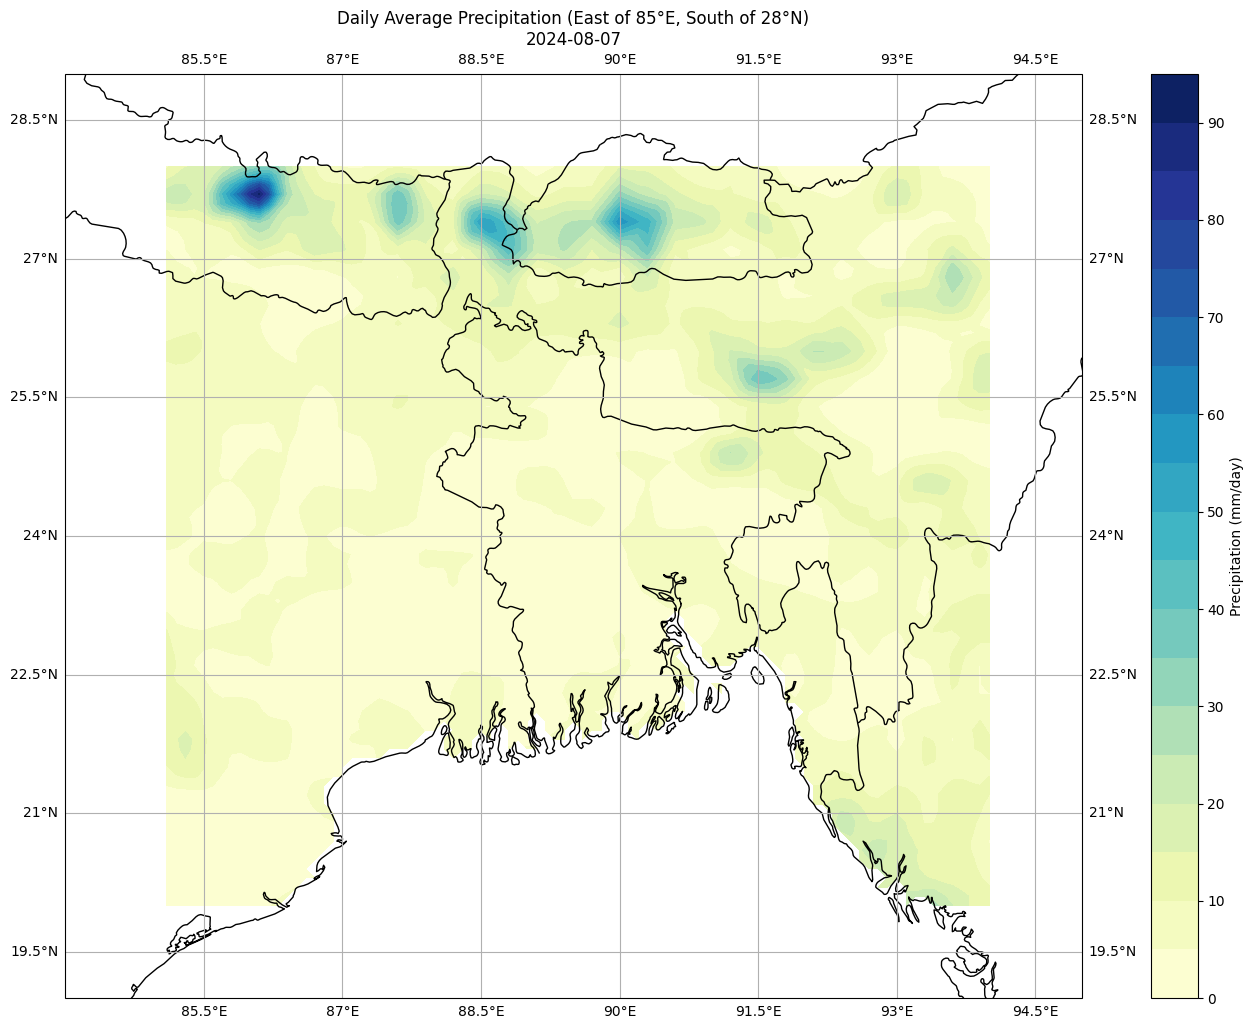

2025-04-13 22:37:01,739 - INFO - Processing 2024-08-08


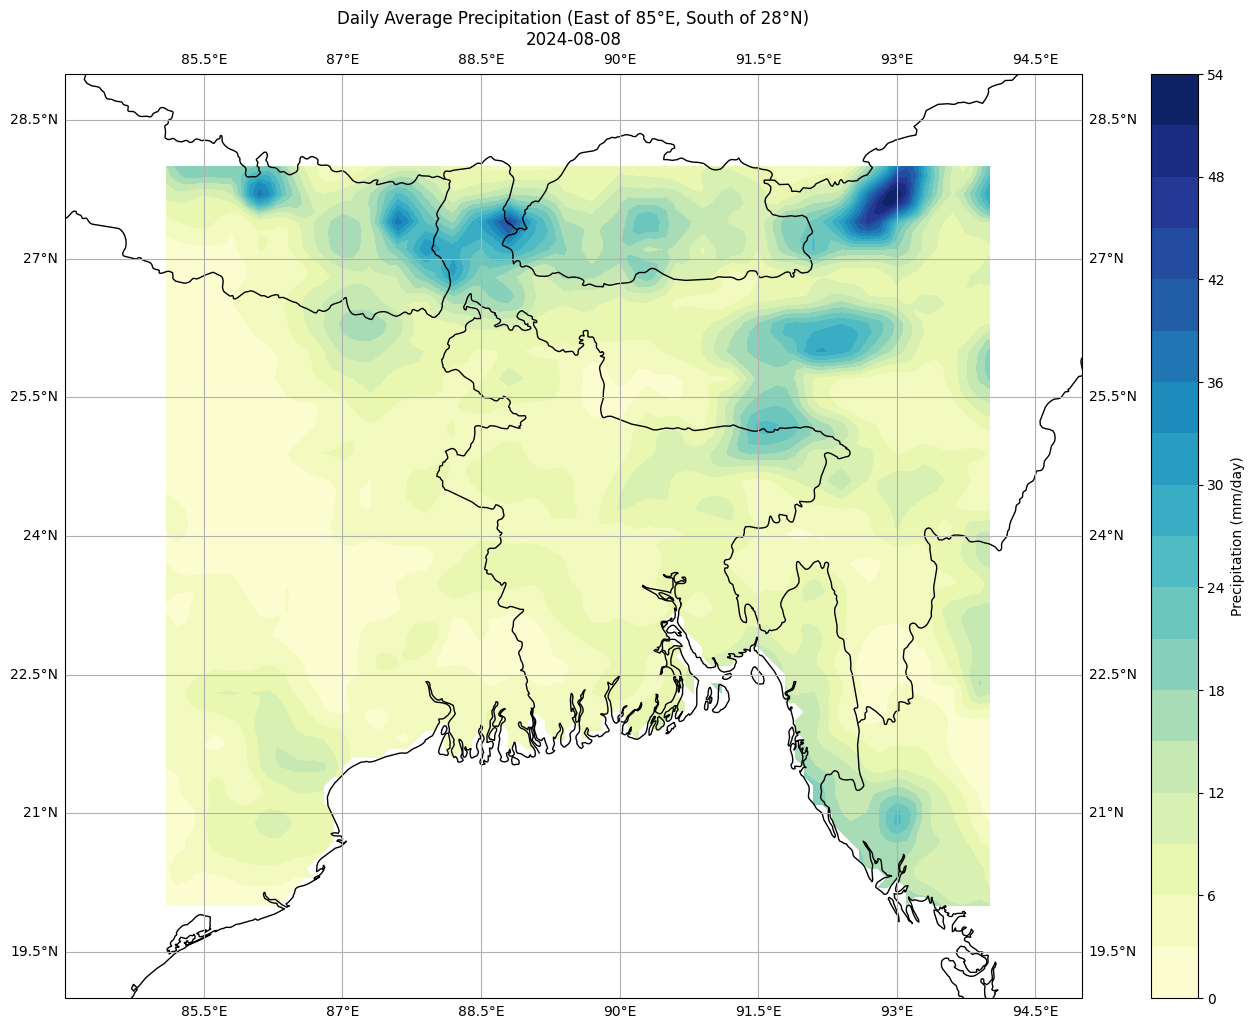

2025-04-13 22:37:02,614 - INFO - Processing 2024-08-09


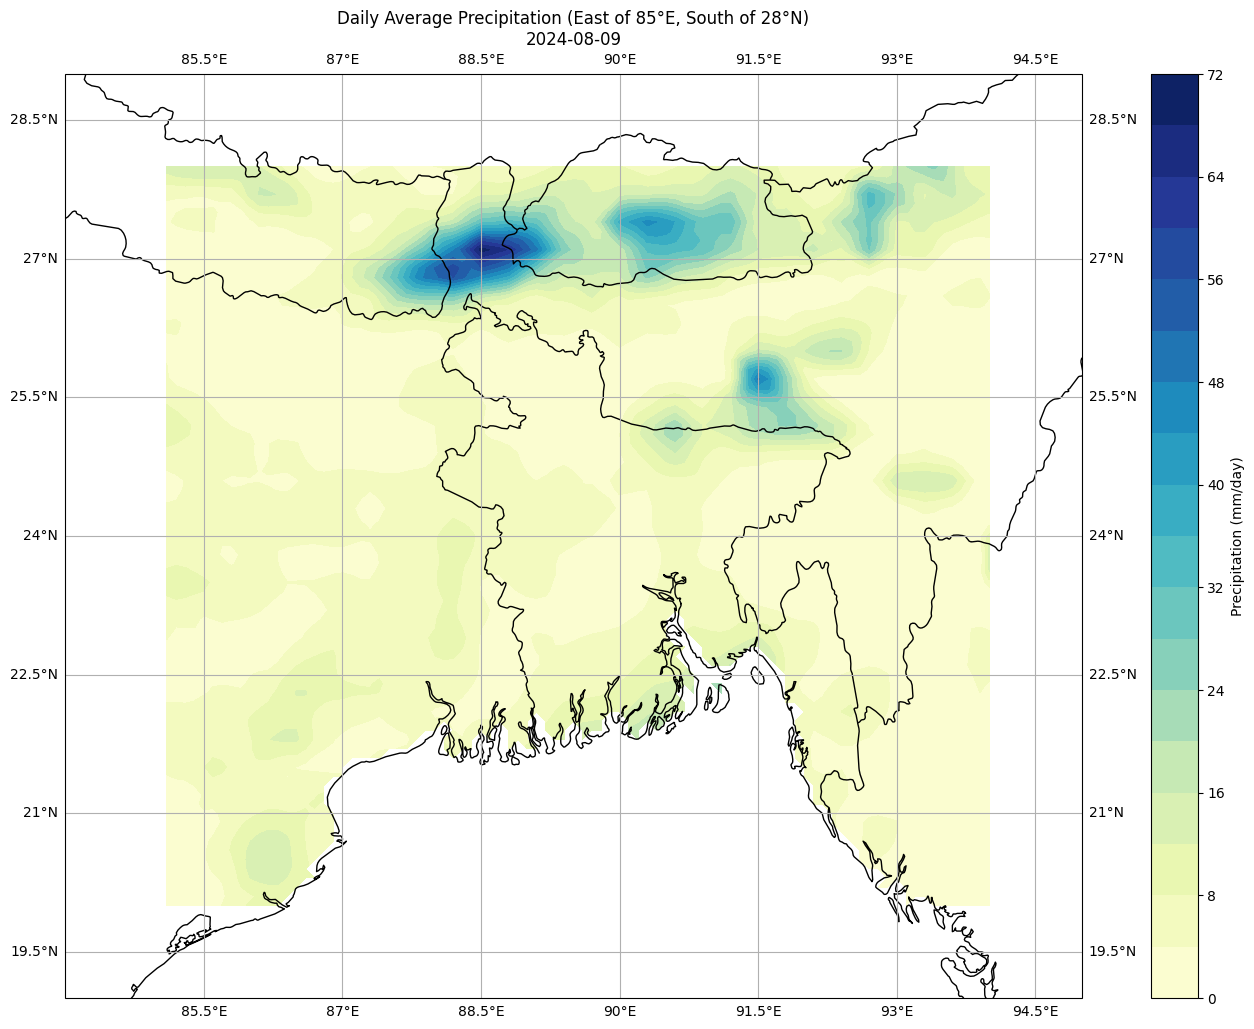

2025-04-13 22:37:03,401 - INFO - Processing 2024-08-10


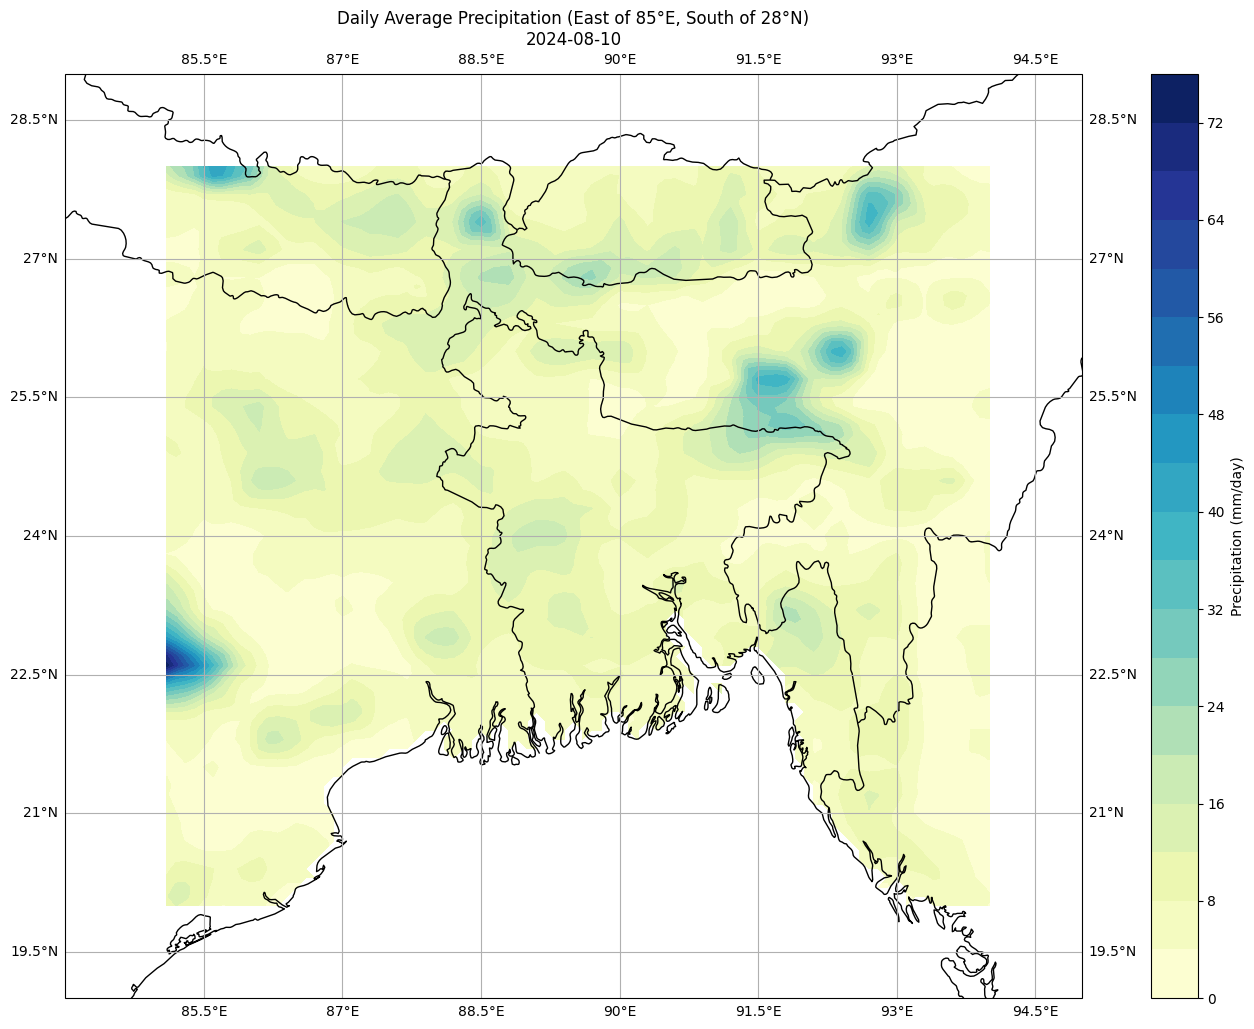

2025-04-13 22:37:04,187 - INFO - Processing 2024-08-11


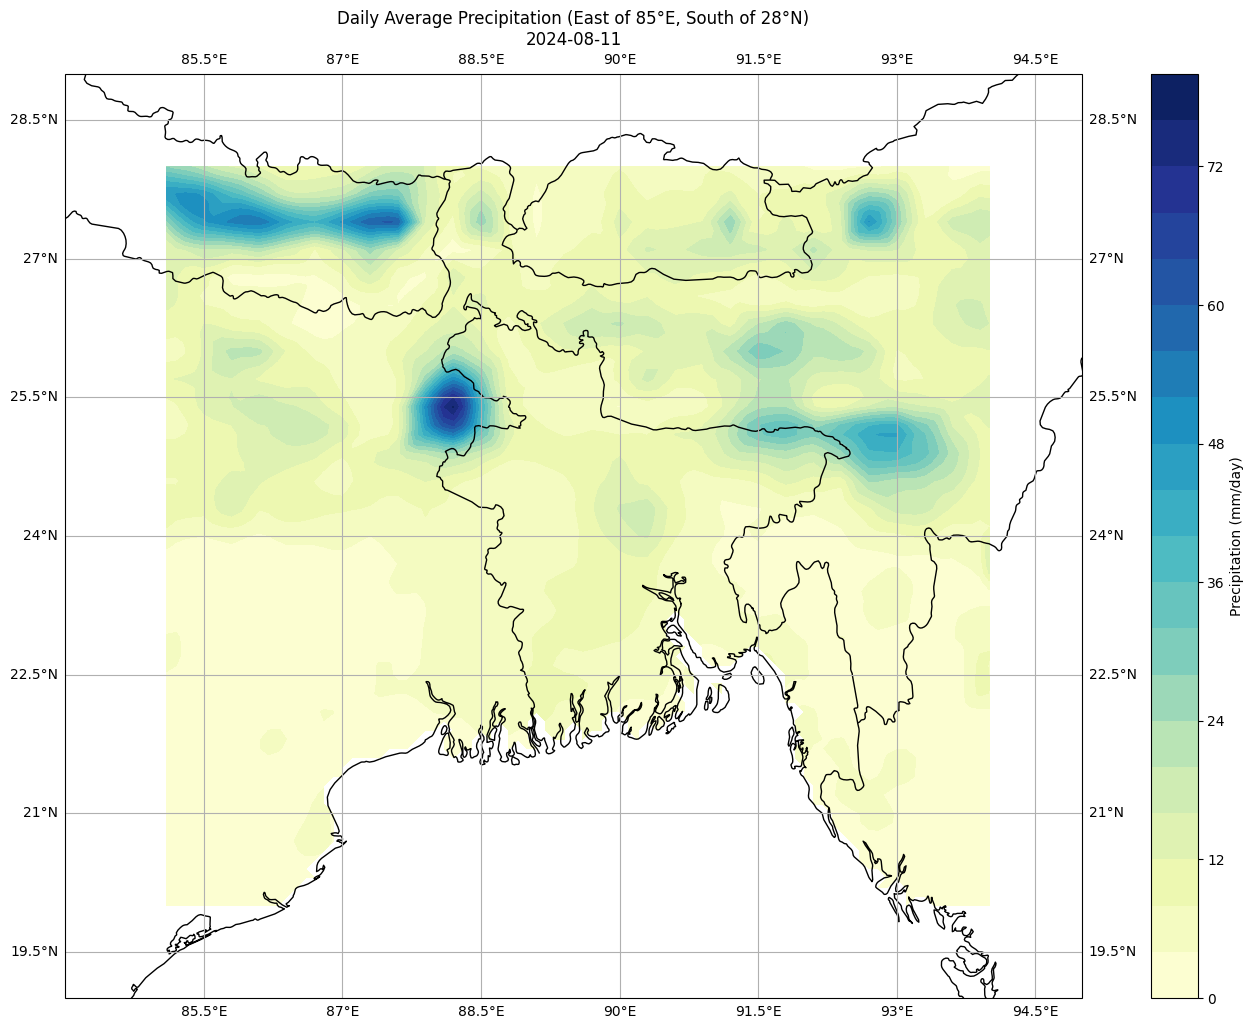

2025-04-13 22:37:04,932 - INFO - Processing 2024-08-12


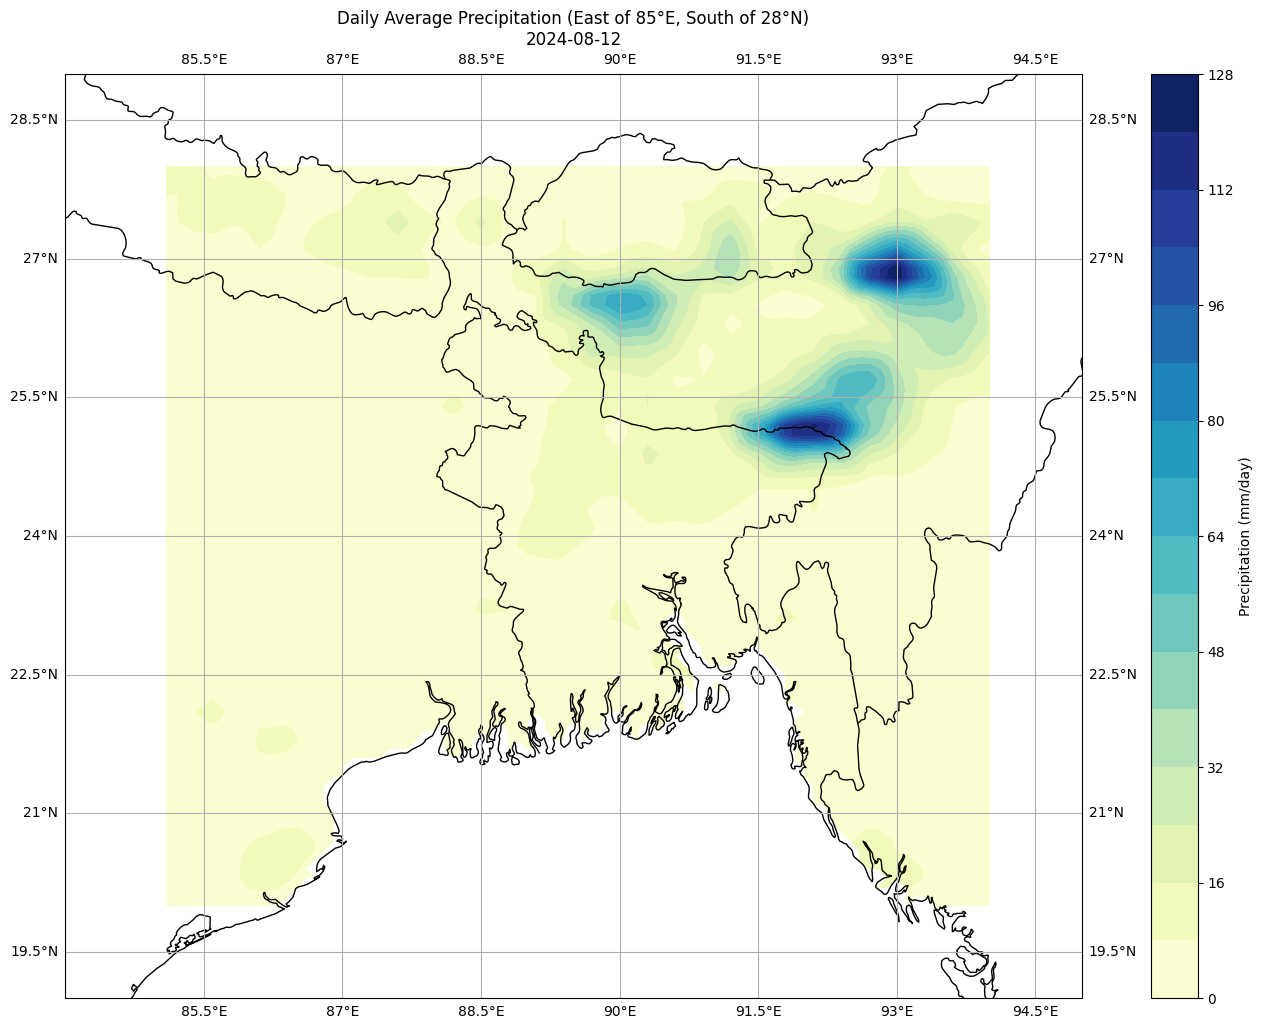

2025-04-13 22:37:05,711 - INFO - Processing 2024-08-13


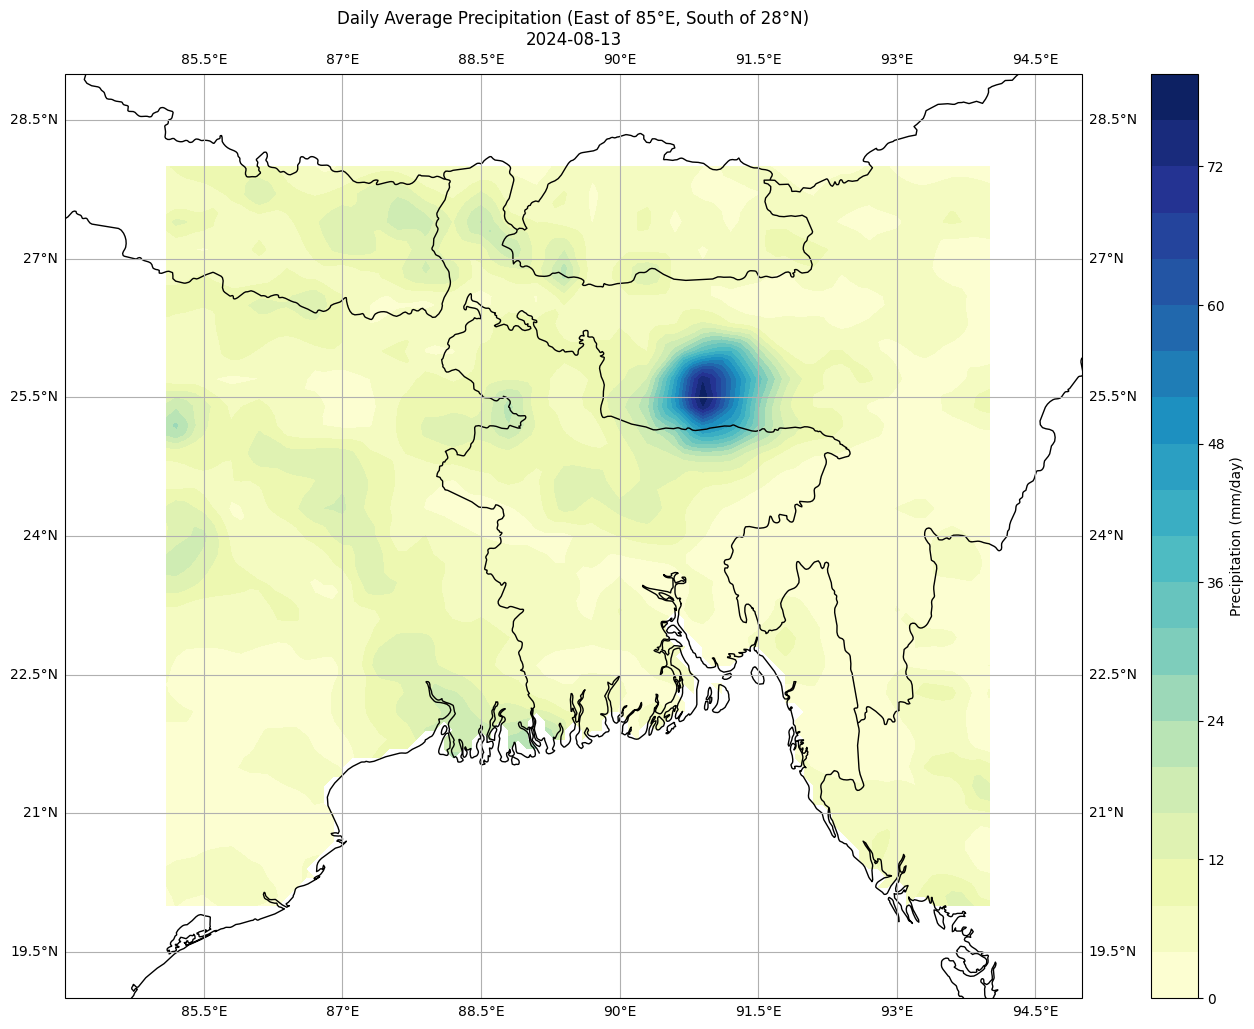

2025-04-13 22:37:06,683 - INFO - Processing 2024-08-14


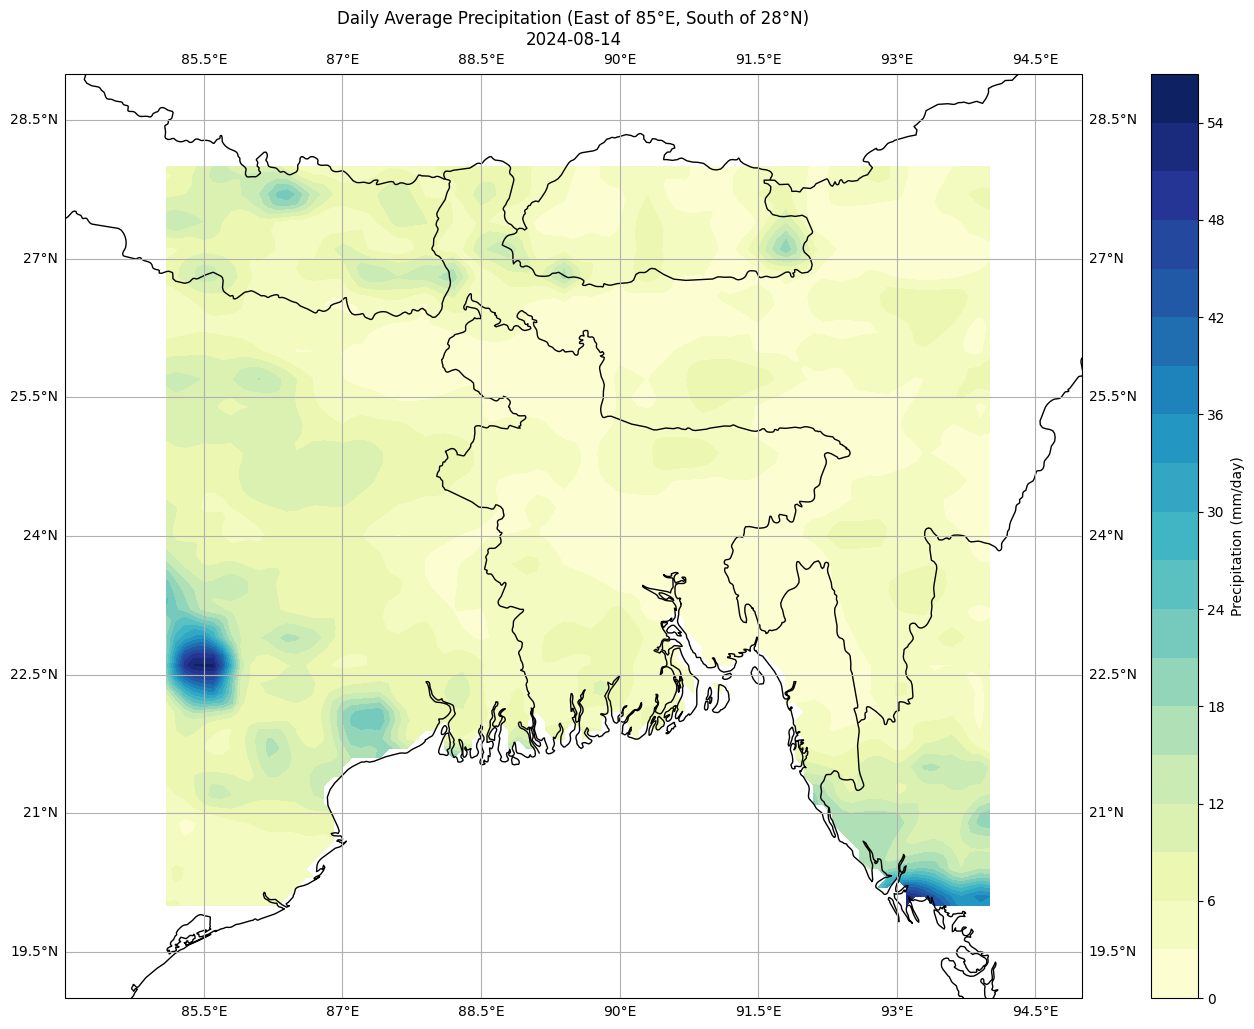

2025-04-13 22:37:07,611 - INFO - Processing 2024-08-15


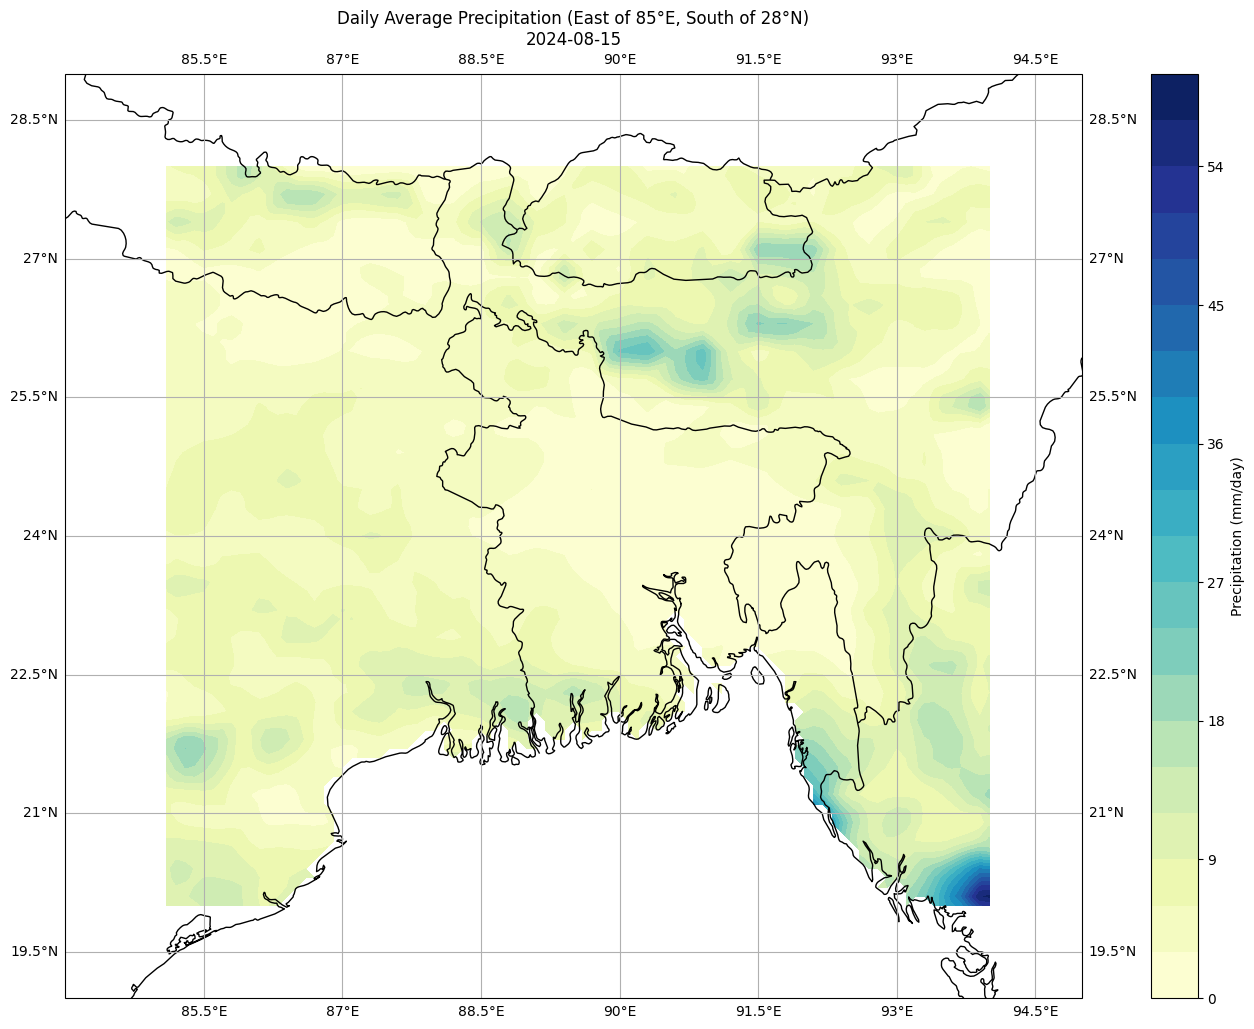

2025-04-13 22:37:08,640 - INFO - Processing 2024-08-16


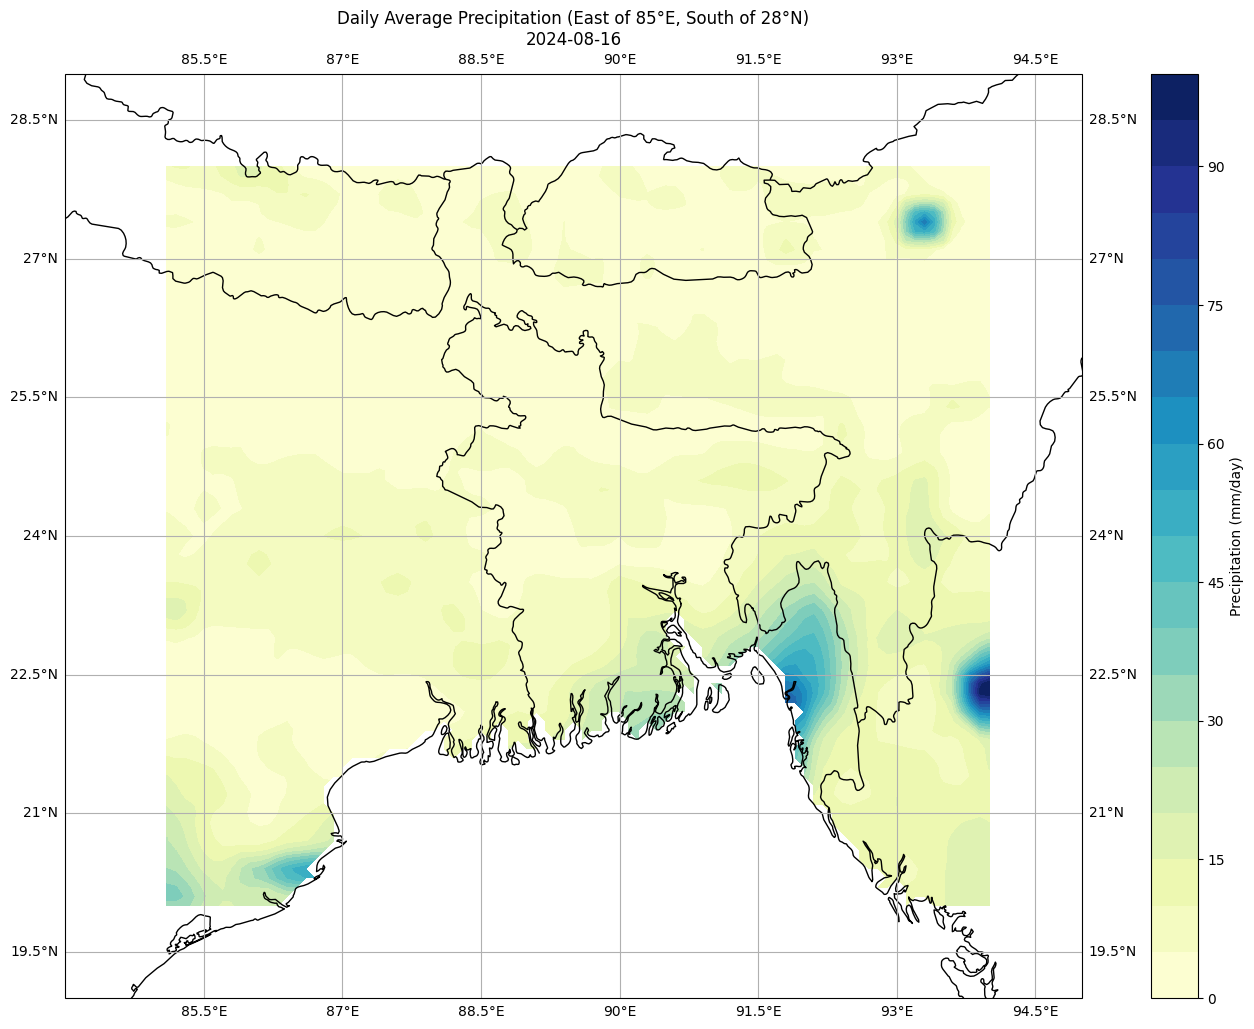

2025-04-13 22:37:10,453 - INFO - Processing 2024-08-17


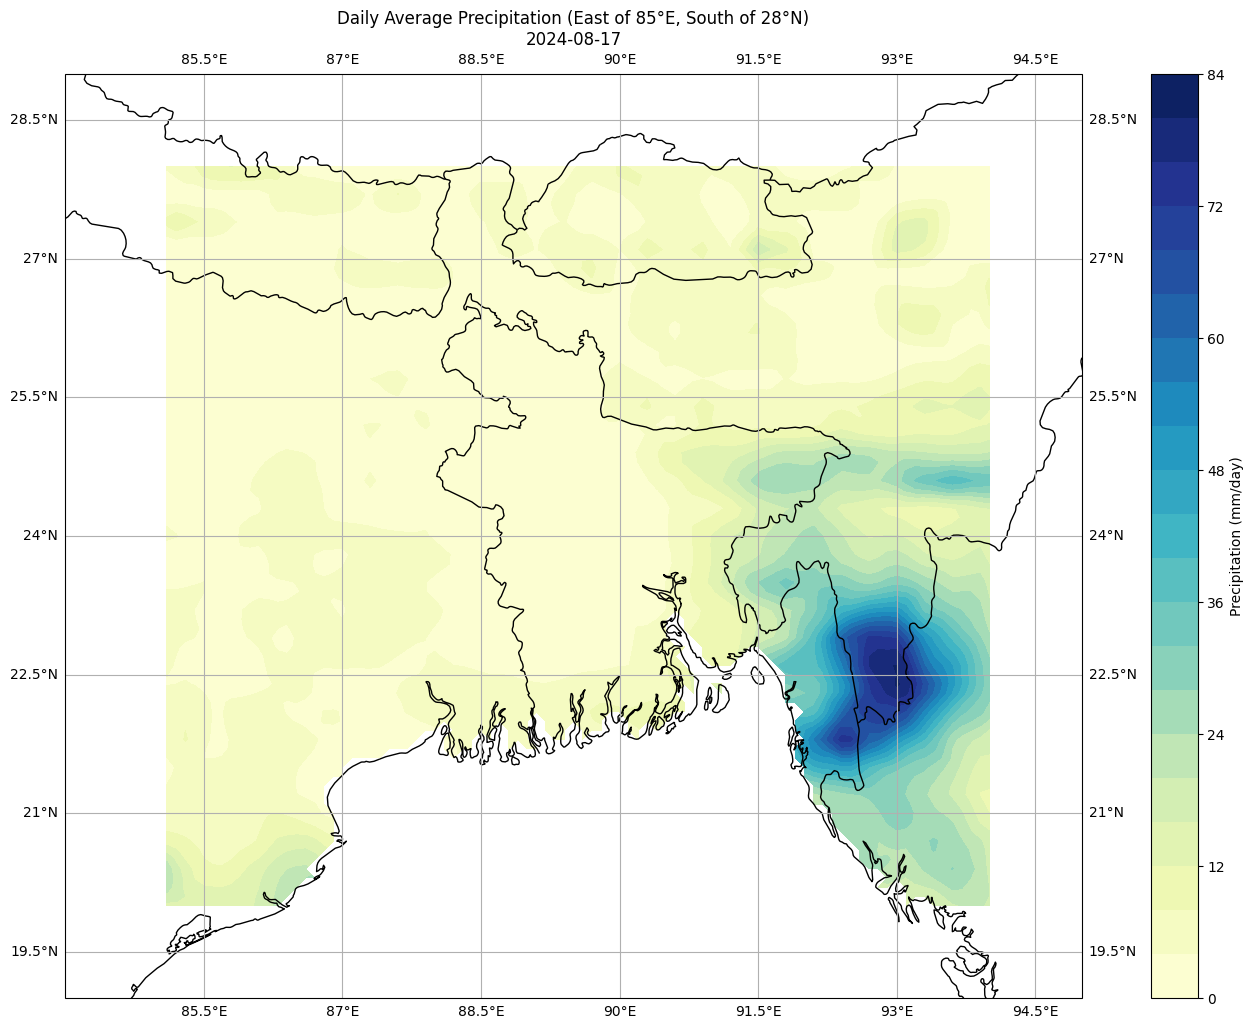

2025-04-13 22:37:11,164 - INFO - Processing 2024-08-18


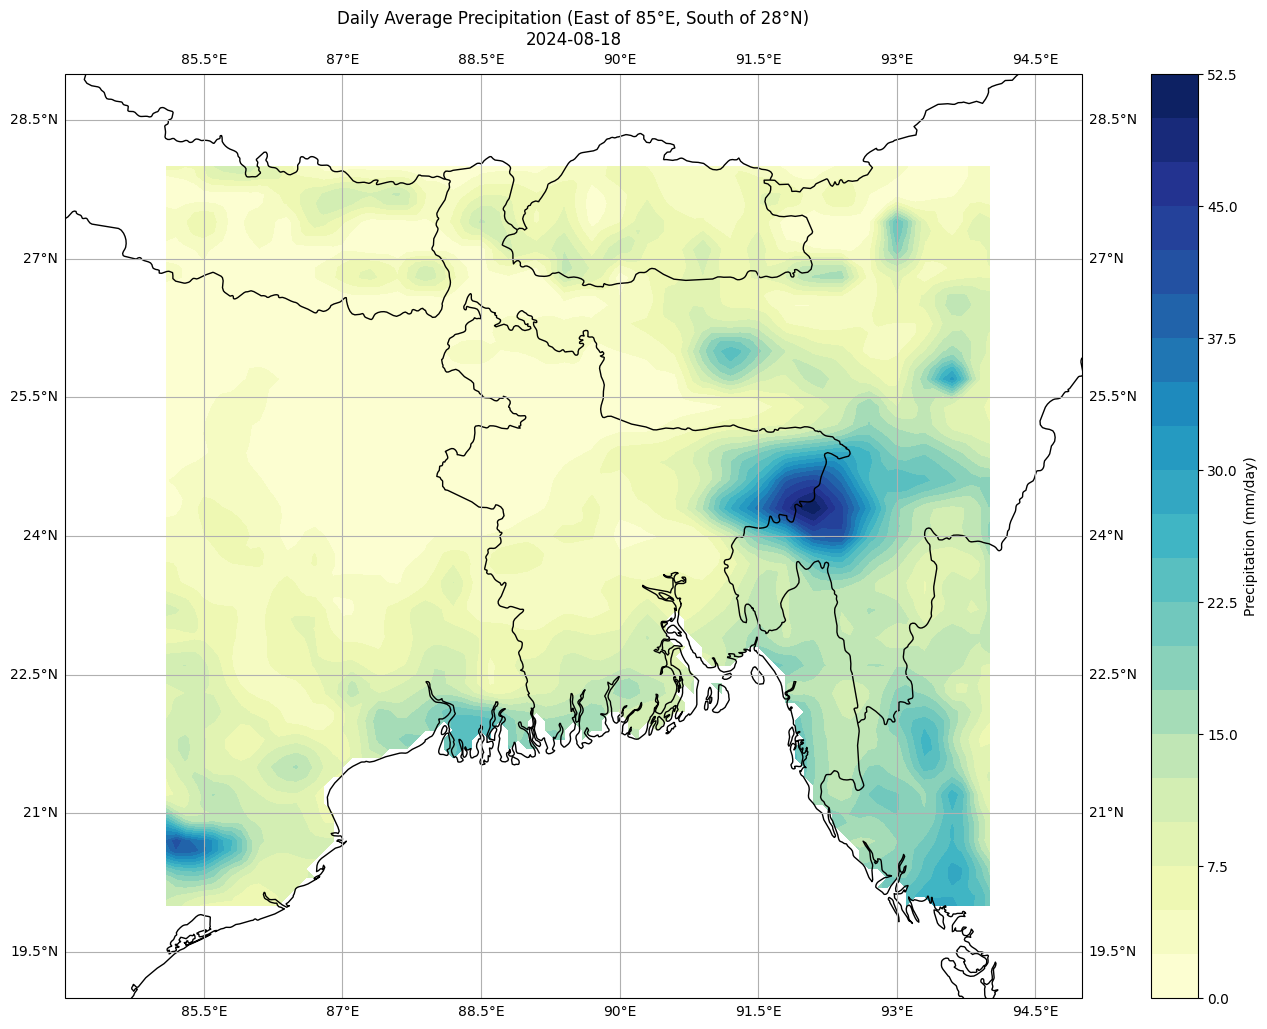

2025-04-13 22:37:11,887 - INFO - Processing 2024-08-19


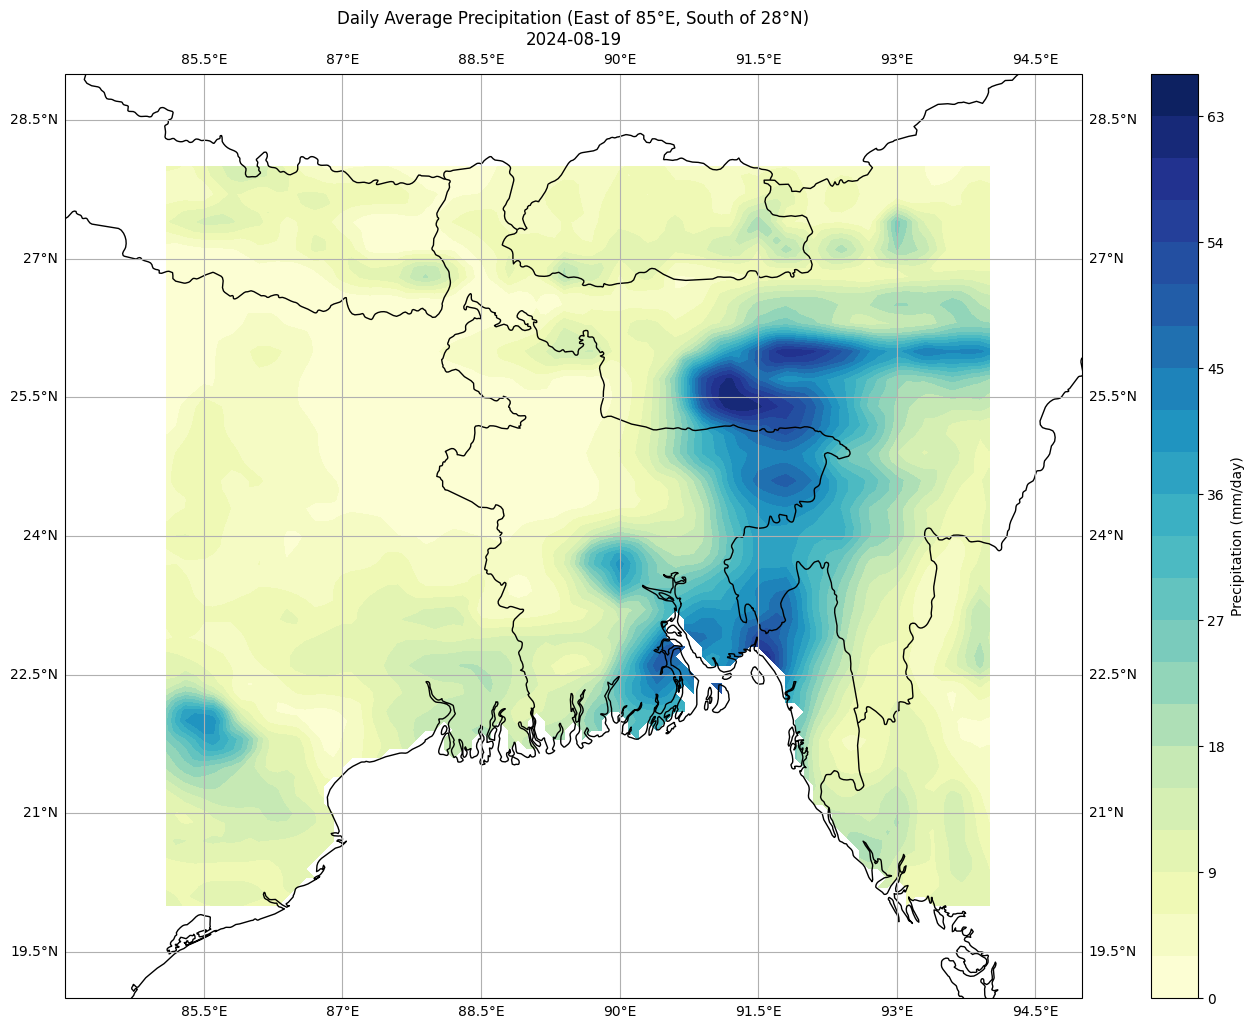

2025-04-13 22:37:12,710 - INFO - Processing 2024-08-20


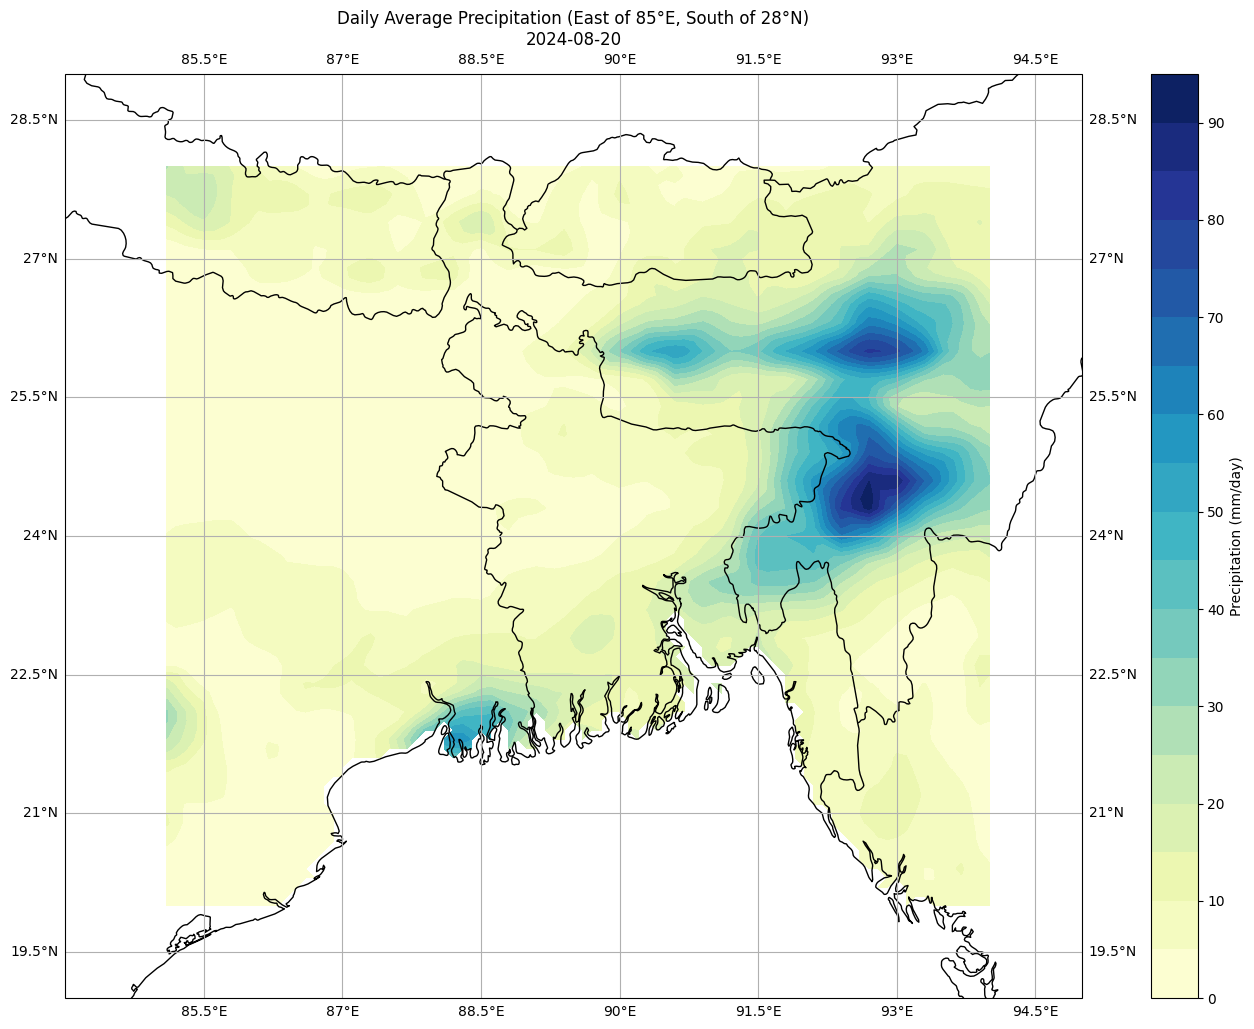

2025-04-13 22:37:13,487 - INFO - Processing 2024-08-21


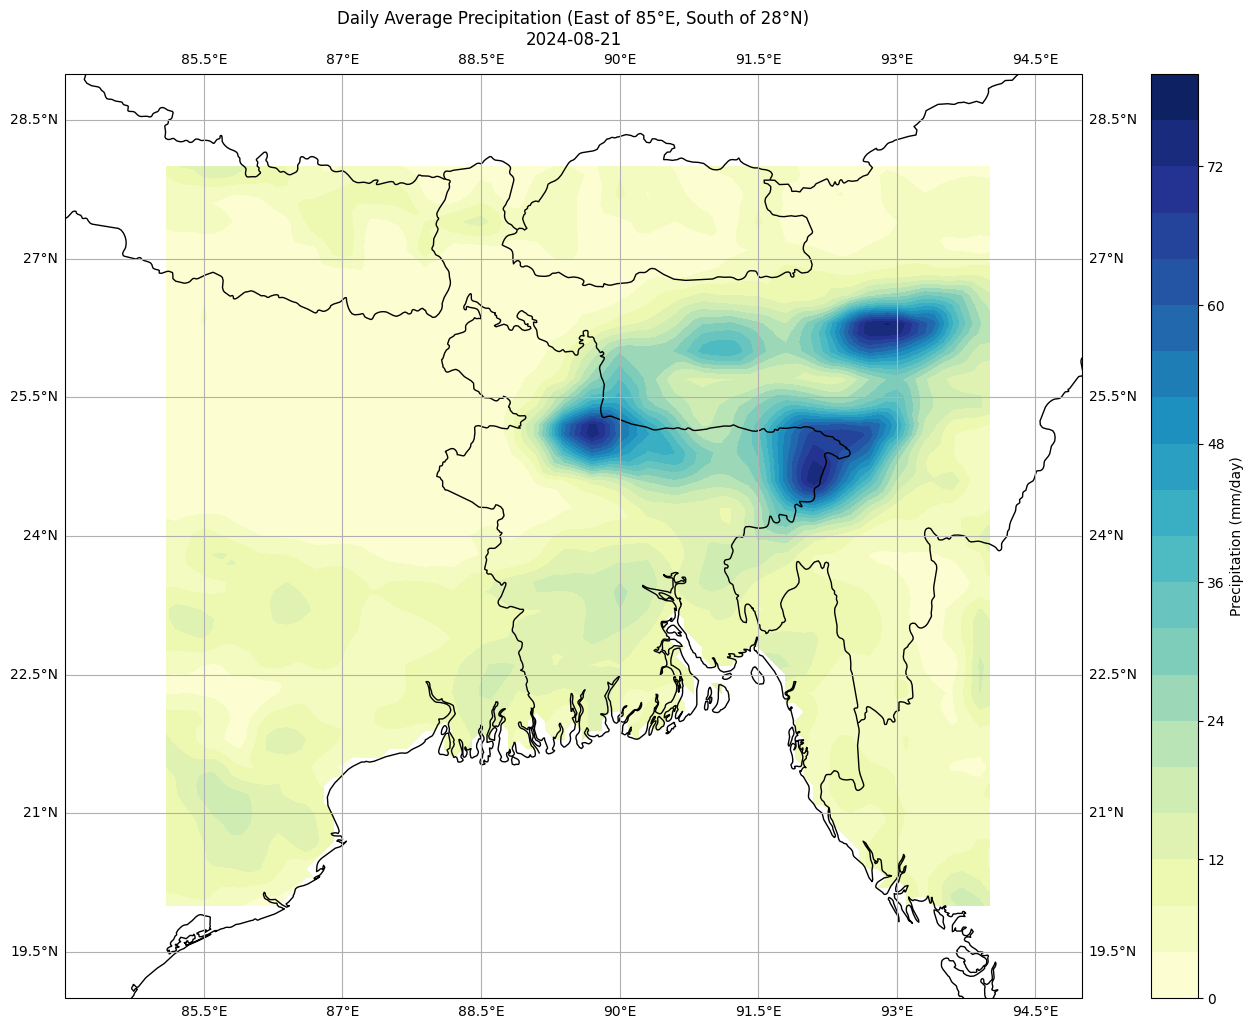

2025-04-13 22:37:14,214 - INFO - Processing 2024-08-22


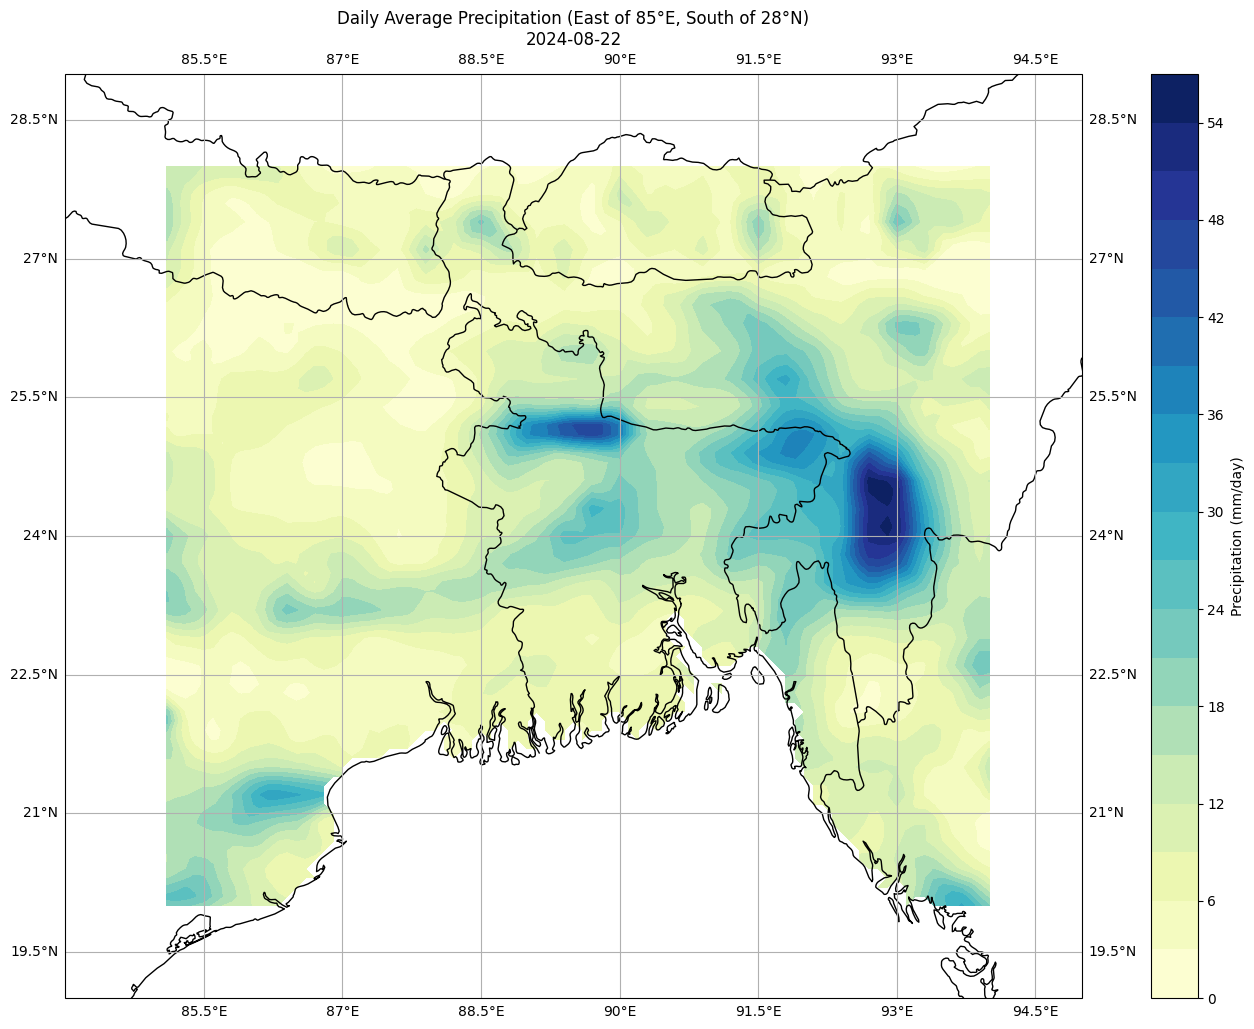

2025-04-13 22:37:15,102 - INFO - Processing 2024-08-23


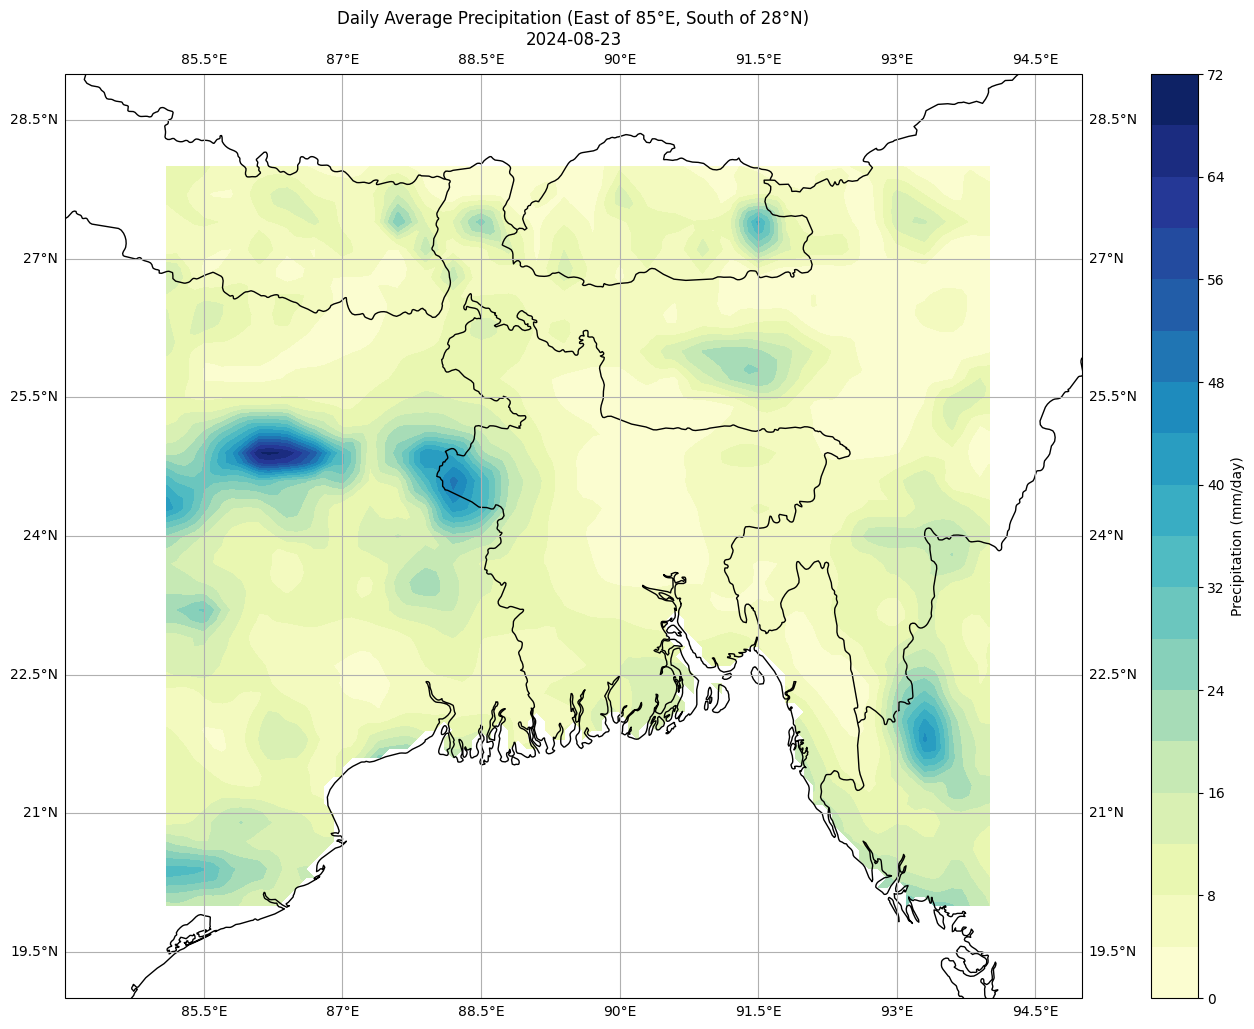

2025-04-13 22:37:15,941 - INFO - Processing 2024-08-24


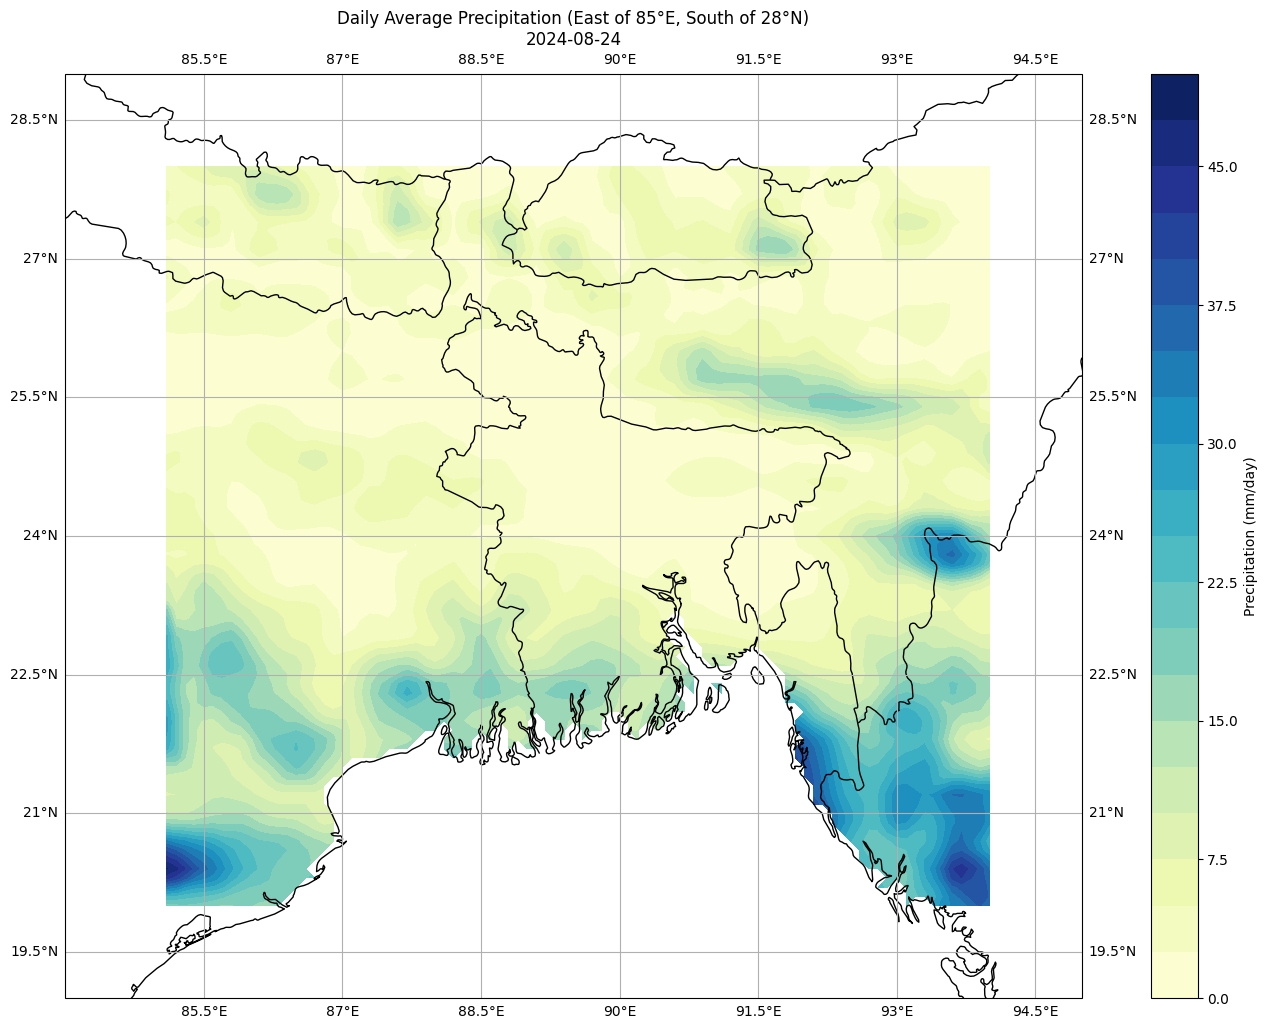

2025-04-13 22:37:16,682 - INFO - Processing 2024-08-25


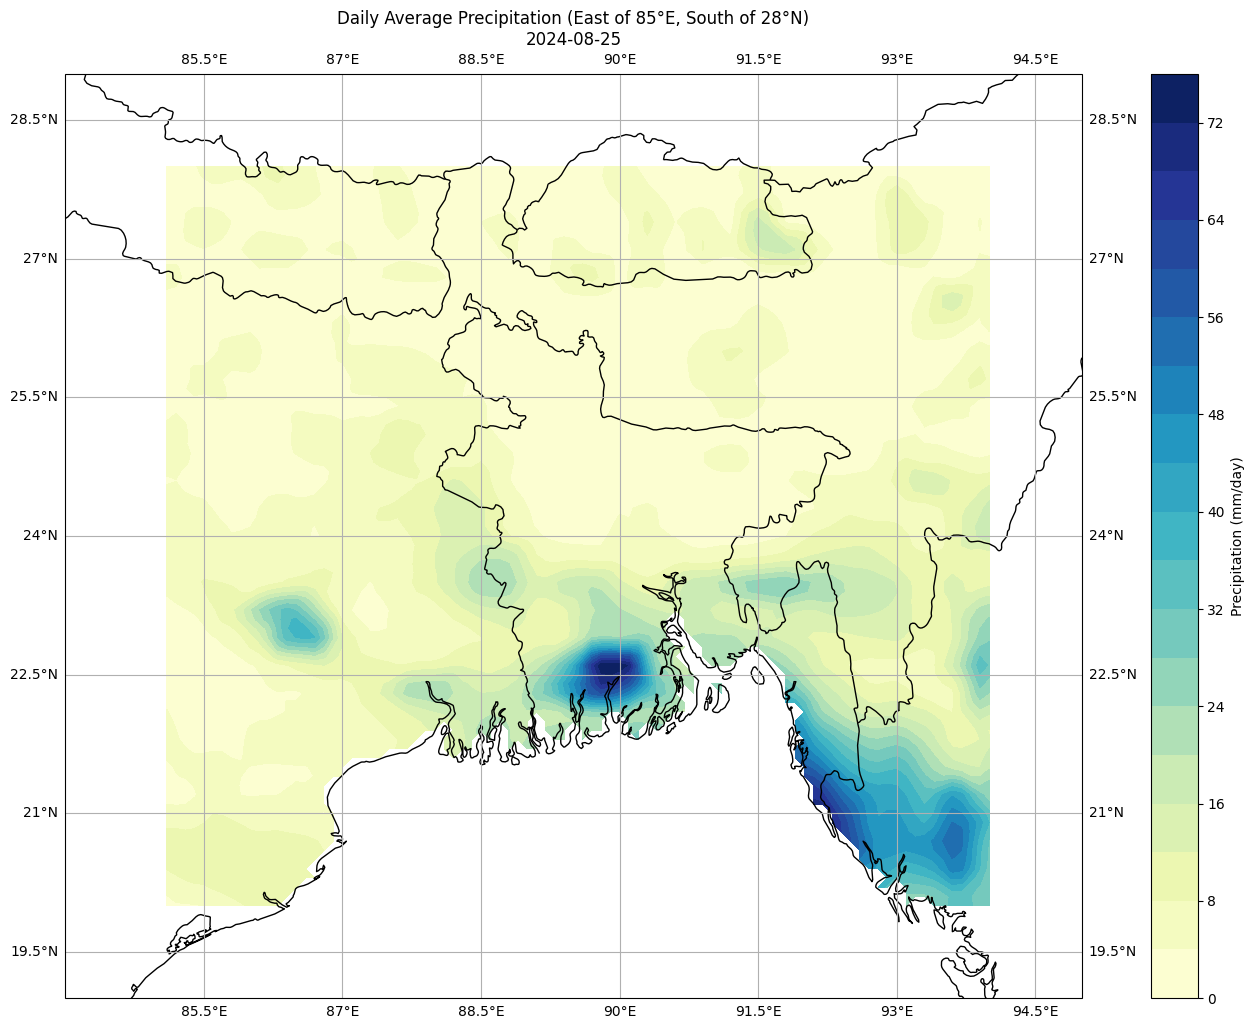

2025-04-13 22:37:17,458 - INFO - Processing 2024-08-26


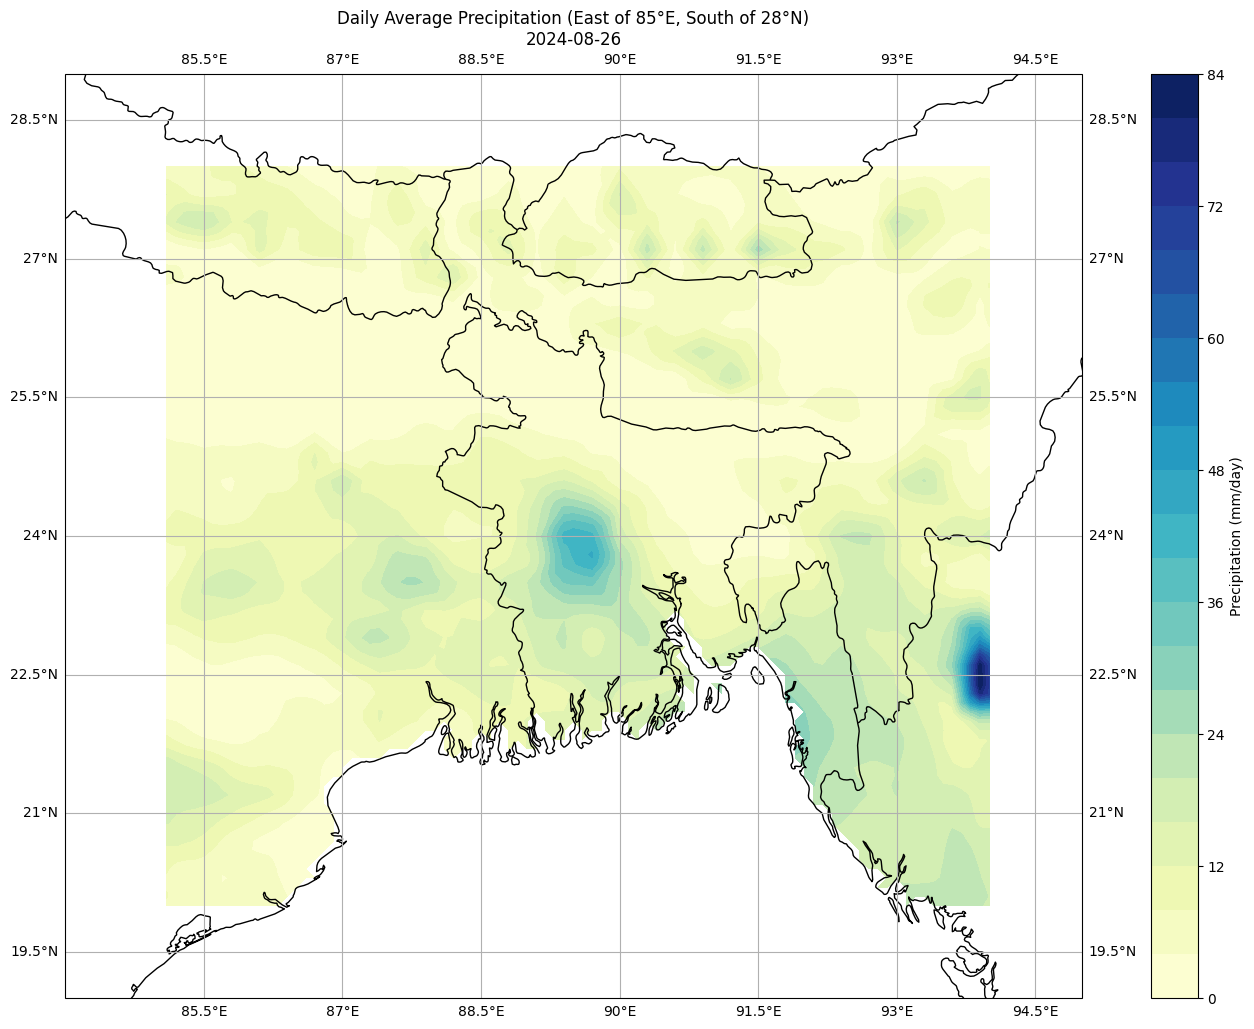

2025-04-13 22:37:18,440 - INFO - Processing 2024-08-27


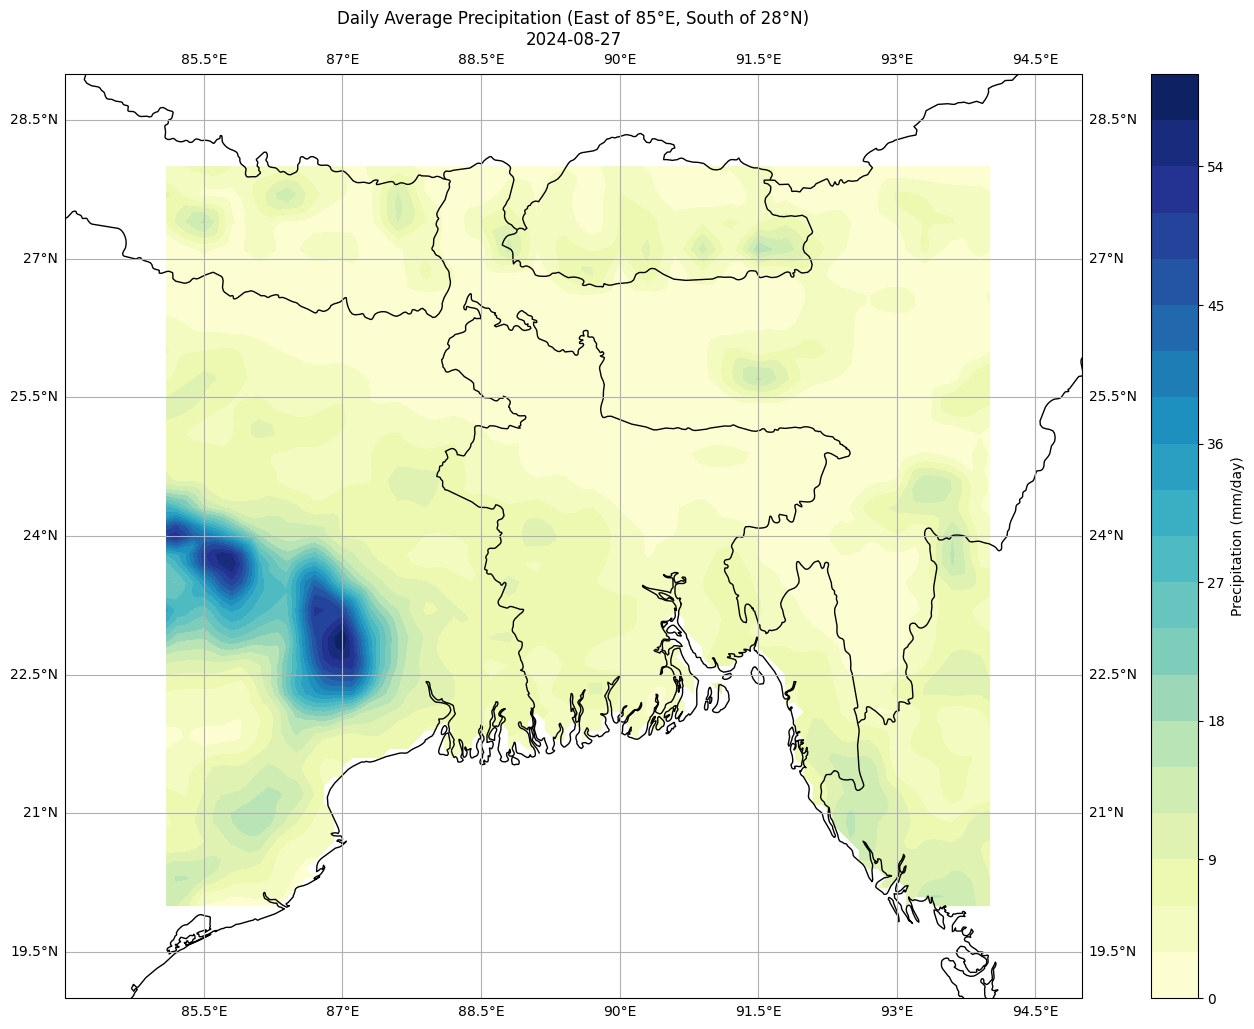

2025-04-13 22:37:20,050 - INFO - Processing 2024-08-28


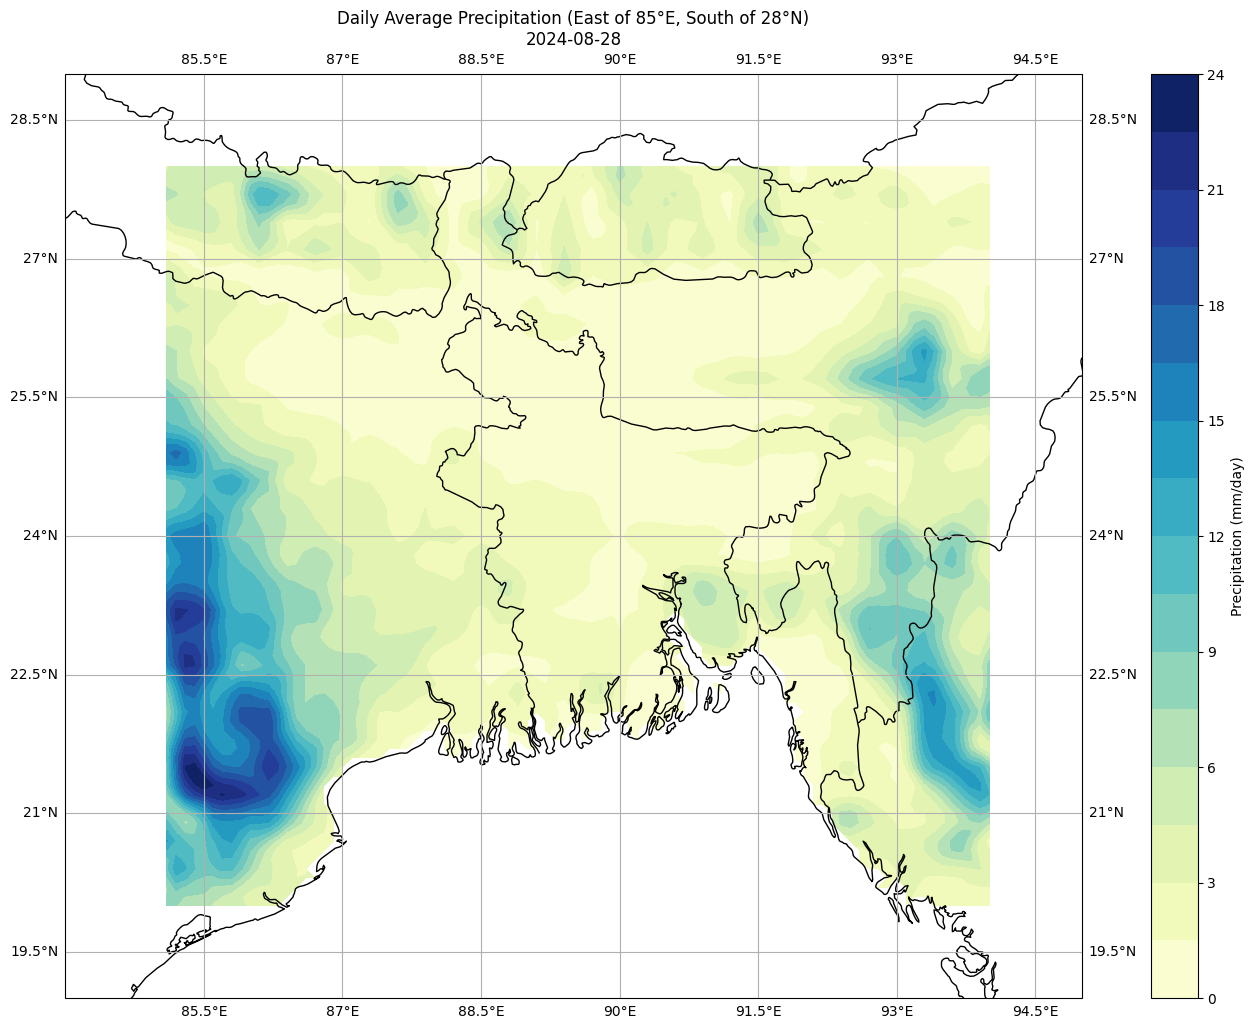

2025-04-13 22:37:22,134 - INFO - Processing 2024-08-29


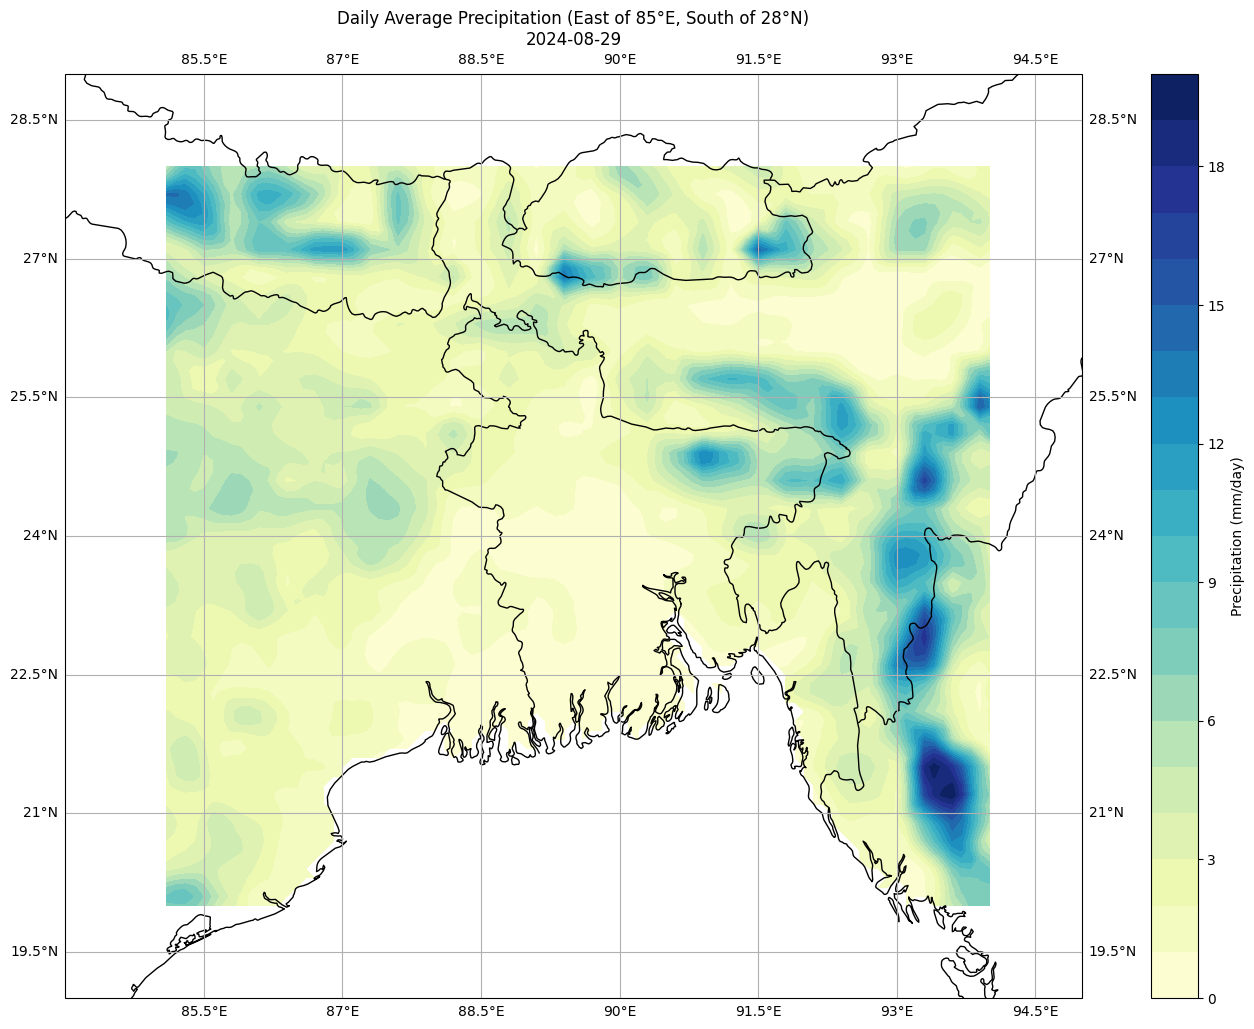

2025-04-13 22:37:23,028 - INFO - Processing 2024-08-30


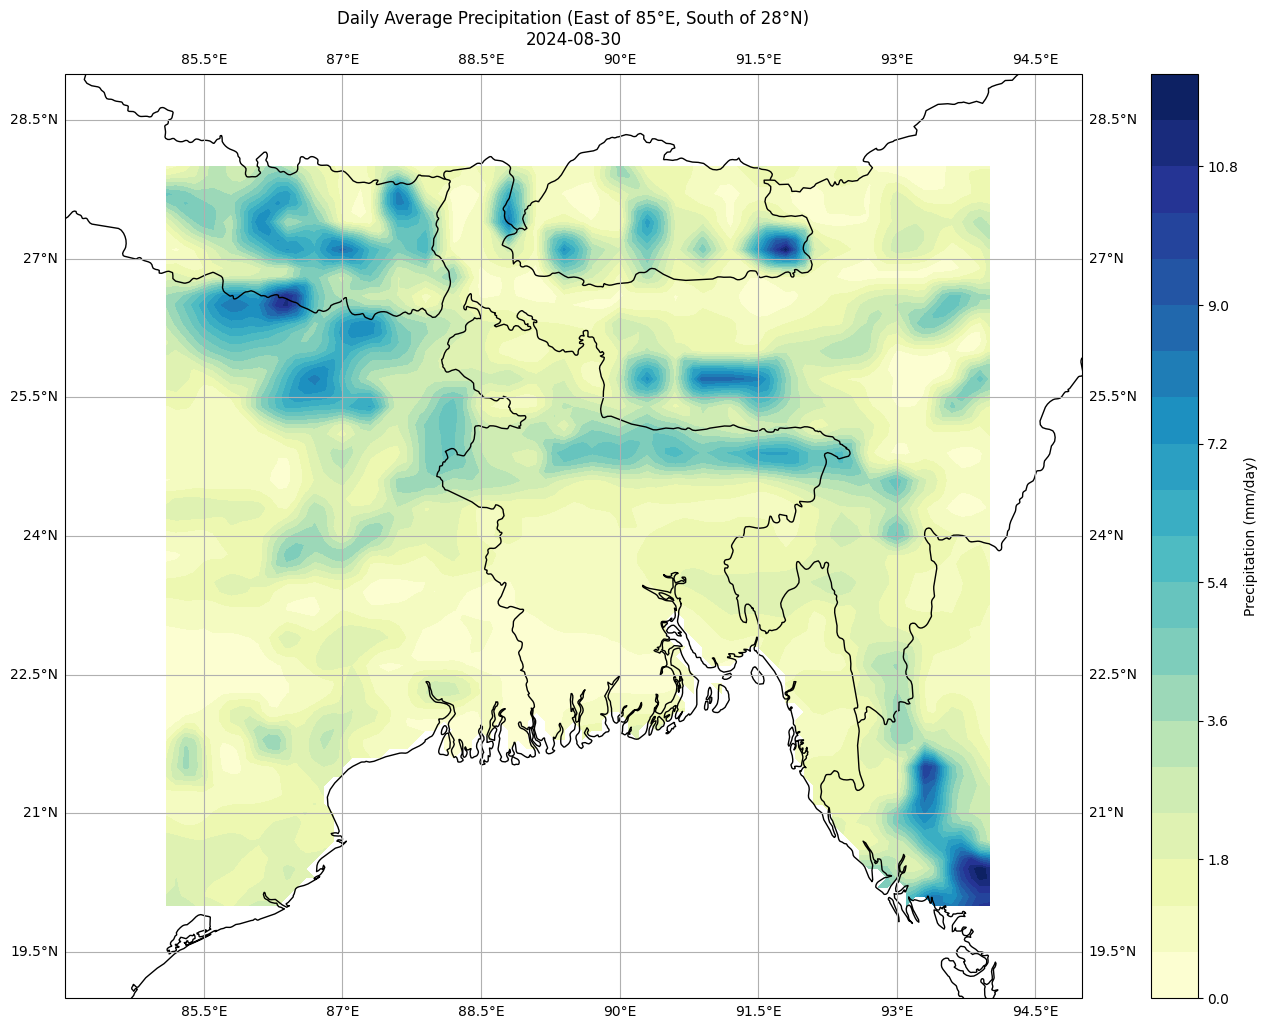

2025-04-13 22:37:23,958 - INFO - Processing 2024-08-31


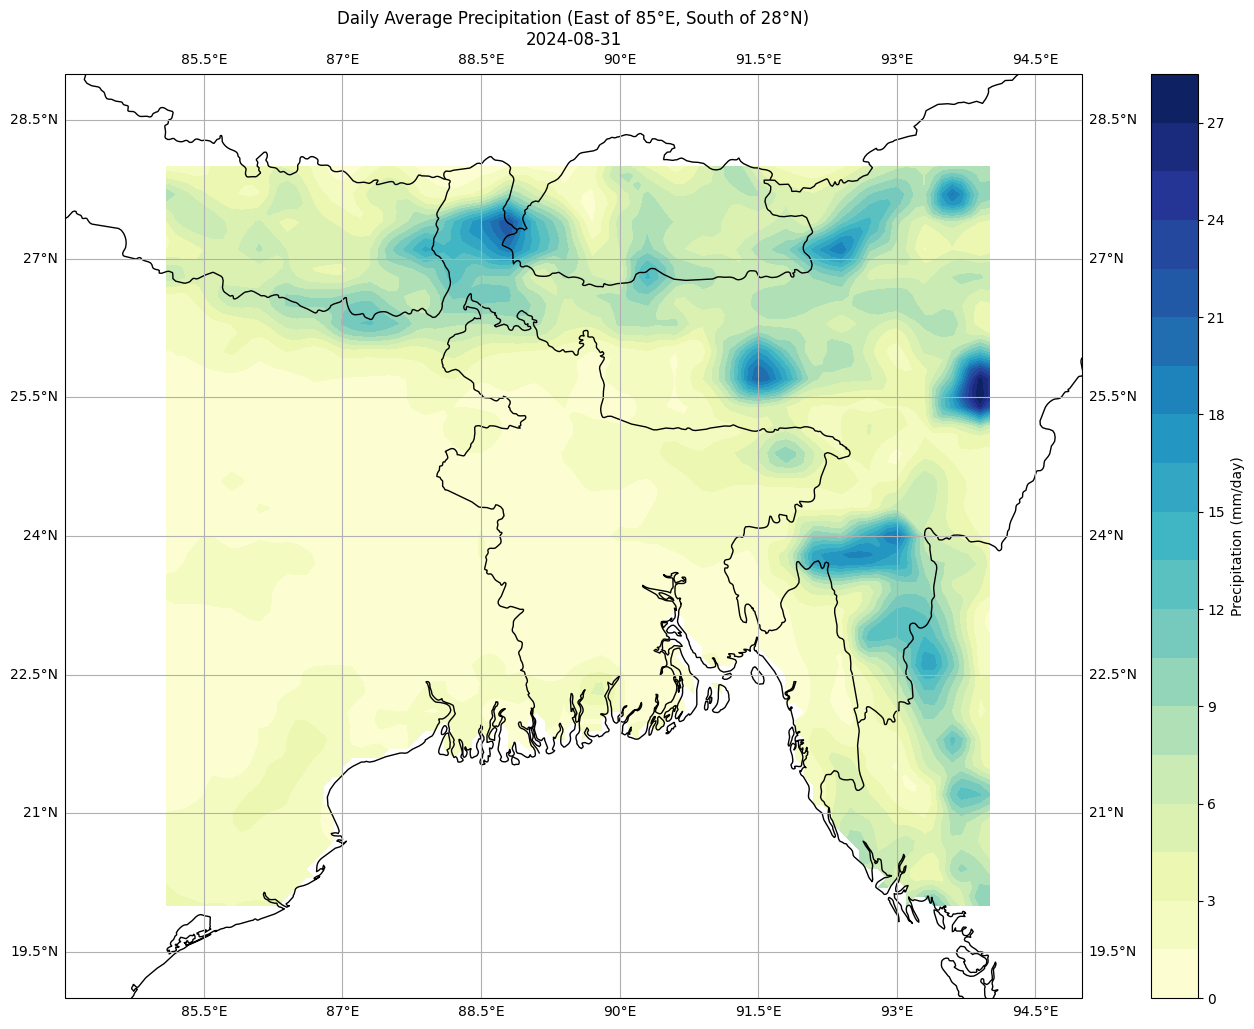

In [10]:
file_path = "C:/Users/saqli/Desktop/Climate_@/9ac60cdbd23b2d20be022c0614fdbdb4.nc"

# Generate dates from August 6 to August 31
start_date = datetime(2024, 8, 6)
end_date = datetime(2024, 8, 31)

current_date = start_date
while current_date <= end_date:
    date_str = current_date.strftime('%Y-%m-%d')
    logging.info(f"Processing {date_str}")
    plot_total_precipitation(file_path, date_str)
    current_date += timedelta(days=1)